In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import json
import time
from datetime import datetime
import numpy as np
from IPython.display import display, Markdown, IFrame
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns
%matplotlib inline


In [3]:
with open("../results_cpp_benchmarker/e2e_results/image_driver_1/cpp-aws-p2-1-inception-1-resnet-3-ksvm-1-logreg-180324_170634.json", "r") as f:
    results = json.load(f)

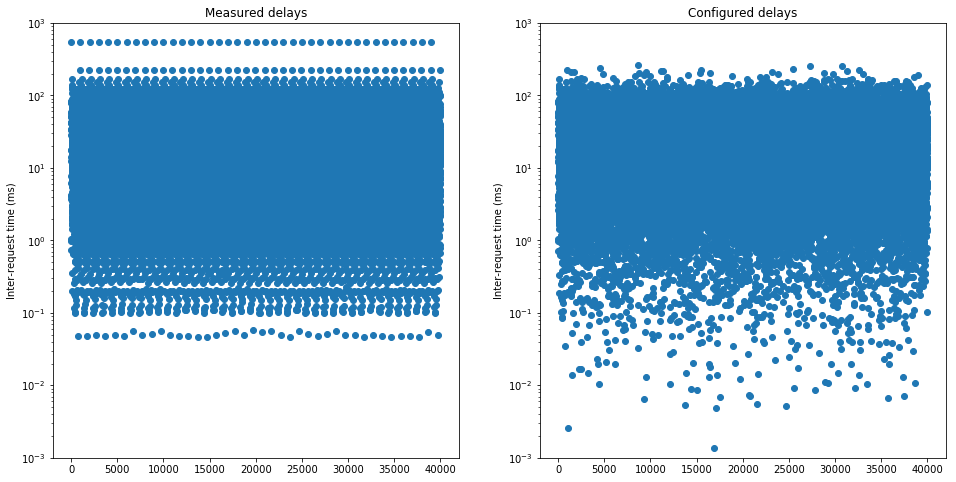

In [42]:
resnet_lineage = results["throughput_results"]["lineage"]["tf-resnet-feats"][:40000]
# print(resnet_lineage[0])
send_times = [l["driver::send"] for l in resnet_lineage]
measured_deltas = np.diff(send_times) / 1000.0
fig, (ax_m, ax_c) = plt.subplots(ncols=2, figsize=(16, 8))
ax_m.scatter(range(len(measured_deltas)), measured_deltas)
ax_m.set_ylabel("Inter-request time (ms)")
ax_m.set_yscale("log")
ax_m.set_ylim(bottom=.001, top=1000)
ax_m.set_title("Measured delays")


with open("../debugging/arrival_deltas_ms.timestamp", "r") as f:
    configured_deltas = np.array([float(l.strip()) for l in f]).flatten()
ax_c.scatter(range(len(configured_deltas)), configured_deltas)
ax_c.set_ylabel("Inter-request time (ms)")
ax_c.set_yscale("log")
ax_c.set_ylim(bottom=.001, top=1000)
ax_c.set_title("Configured delays")

plt.show()

In [55]:
print("MIN: measured: {}, configured: {}".format(np.min(measured_deltas), np.min(configured_deltas)))

def bottom_k(arr, k):
    sorted_idx = np.argsort(arr)
    return arr[sorted_idx[:k]]

print(bottom_k(measured_deltas, 20))
print(bottom_k(configured_deltas, 20))

np.sum(configured_deltas <= .047)


MIN: measured: 0.047, configured: 0.000186616787687
[ 0.047  0.047  0.047  0.047  0.047  0.047  0.048  0.048  0.048  0.048
  0.048  0.048  0.048  0.048  0.048  0.048  0.049  0.049  0.049  0.049]
[ 0.00018662  0.00135032  0.00256477  0.00489345  0.00515161  0.00538488
  0.00558125  0.00640525  0.00658354  0.00692928  0.00717697  0.00720647
  0.00742497  0.00864136  0.00872498  0.00879588  0.00906728  0.00920173
  0.01029376  0.01050771]


92

In [ ]:
for s in summary:
    print(s["client_p99_lats"]["e2e"])

In [ ]:
int(list([0]["data_lists"][0]['tf-log-reg:prediction_latencies']["items"][0].values())[0])

In [ ]:
def extract_all_latencies(results_json):
    client_metrics = results_json["throughput_results"]["client_metrics"]
    latencies = []
    key_name = "e2e:prediction_latencies"
    for trial in client_metrics:
        for l in trial["data_lists"]:
            if list(l.keys())[0] == key_name:
                cur_lats = [float(list(i.values())[0]) for i in l[key_name]["items"]]
                latencies.extend(cur_lats)
    all_lats = np.array(latencies).flatten() / 1000.0 / 1000.0  # Convert micros to secs
    return all_lats
    
lats = extract_all_latencies(results)

In [ ]:
print(np.mean(lats))
print(len(lats))

print("P99: " + str(np.percentile(lats[:40000], 99)))
print("MAX: " + str(np.max(lats)))

In [ ]:
plt.scatter(range(len(lats)), lats)
plt.ylabel("Latency (s)")
plt.xlabel("Query ID")
plt.show()